<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/S4E5_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with an Flood Dataset
Playground Series - Season 4, Episode 4


####**Dataset Description**
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Abalone dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

Files
**train.csv** - the training dataset; Rings is the integer target
**test.csv** - the test dataset; your objective is to predict the value of Rings for each row
**sample_submission.csv** - a sample submission file in the correct format

#### **The Data**

Here are some further information about the features:

Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.  Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

* Sex / nominal / -- / M, F, and I (infant)
* Length / continuous / mm / Longest shell measurement
* Diameter	/ continuous / mm / perpendicular to length
* Height / continuous / mm / with meat in shell
* Whole weight / continuous / grams / whole abalone
* Shucked weight / continuous	 / grams / weight of meat
* Viscera weight / continuous / grams / gut weight (after bleeding)
* Shell weight / continuous / grams / after being dried
* Rings / integer / -- / +1.5 gives the age in years

In [145]:
%%capture
run_n = 1
if run_n==0:
  #!pip install tensorflow-addons
  #!pip install shap
  #!pip install eli5
  #!pip install tf-nightly
  #!pip install -U scikit-learn==1.2.0
  !pip install catboost
  #!pip install haversine
  #!pip install pytorch-forecasting
  #!pip install umap-learn
  #!pip install reverse_geocoder
  #!pip install --upgrade protobuf
  !pip install colorama
  #!pip install imbalanced-learn
  !pip install optuna
  !pip install optuna-integration
  #!pip install pygam
  !pip install keras-tuner --upgrade
  #!pip install pycaret
  #!pip install lightning==2.0.1
  !pip install keras-nlp
  #!pip install MiniSom
  !pip install category_encoders
  !pip install BorutaShap
  !pip install feature-engine
  !pip install scikit-learn==1.4.1
  !pip install scikit-lego

In [146]:
#importing modules

import warnings
warnings.filterwarnings('ignore')
import time
t = time.time()

from IPython.display import display_html, clear_output;
clear_output();

print('Importing started...')

# basic moduele
import os
import numpy as np
import pandas as pd
from copy import deepcopy
import re
#from scipy import stats
from random import randint
from prettytable import PrettyTable
import random
import math
import os
import gc
import pickle
from glob import glob
from IPython import display as ipd
from tqdm import tqdm
from datetime import datetime
from joblib import dump, load
import sklearn as sk
#from imblearn.over_sampling import SMOTE, RandomOverSampler
from functools import partial
import itertools
import joblib
from itertools import combinations
import IPython
import statsmodels.api as sm
import IPython.display
#from umap import UMAP

# visualization moduels
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib_venn import venn2_unweighted
import seaborn as sns
import missingno as msno
#import imblearn
import scipy.stats as stats
from scipy.special import boxcox, boxcox1p


# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
#sns.set_theme(style="ticks", context="notebook")
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# Style Import
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  TweedieRegressor,
                                  ARDRegression,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer, KNNImputer

from category_encoders import MEstimateEncoder, CatBoostEncoder, OrdinalEncoder

# Other Models
#from pygam import LogisticGAM, s, te
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

#import catboost as cat
from catboost import CatBoost, CatBoostRegressor
from catboost import CatBoostClassifier

#from catboost.utils import get_roc_curve

from lightgbm import early_stopping
# check installed version
#import pycaret
warnings.filterwarnings("ignore")
#from minisom import MiniSom

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#Interpretiability of the model
#import shap
#import eli5
#from eli5.sklearn import PermutationImportance


## miss
from sklearn.pipeline import (make_pipeline,
                              Pipeline)


import feature_engine as fe
from feature_engine.creation import MathFeatures

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
#import tensorflow_addons as tfa
from keras.utils import FeatureSpace
import keras_nlp

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization
# Model Tuning tools:
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour
# Feature selection
from BorutaShap import BorutaShap
%matplotlib inline
SEED = 1984
N_SPLITS = 10

# Personal Library

print('Done, All the required modules are imported. Time elapsed: {} sec'.format(time.time()-t))

Importing started...
Done, All the required modules are imported. Time elapsed: 0.020068645477294922 sec


<Figure size 800x550 with 0 Axes>

In [147]:
%%time

# Setting rc parameters in seaborn for plots and graphs-
# Reference - https://matplotlib.org/stable/tutorials/introductory/customizing.html:-
# To alter this, refer to matplotlib.rcParams.keys()

sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.75,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : '#0099e6',
         'axes.titlesize'       : 8.5,
         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

# Color printing
def PrintColor(text:str, color = Fore.BLUE, style = Style.BRIGHT):
    "Prints color outputs using colorama using a text F-string";
    print(style + color + text + Style.RESET_ALL);

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
#sns.set_theme(style="ticks", context="notebook")
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

print();
gc.collect();


CPU times: user 765 ms, sys: 8.21 ms, total: 773 ms
Wall time: 767 ms


331

<Figure size 800x550 with 0 Axes>

In [148]:
# Check Versions:
print("CHECK VERSIONS:")
print(f"sns: {sns.__version__}")
print(f"mpl: {mpl.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sk.__version__}")
print(f"statsmodels: {sm.__version__}")
print(f"missingno: {msno.__version__}")
#print(f"TF-addon: {tfa.__version__}")
#print(f"Inbalance_Learning: {imblearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
#print(f"CatBoost: {cat.__version__}")
#print(f"PyCaret: {pycaret.__version__}")

CHECK VERSIONS:
sns: 0.13.1
mpl: 3.7.1
tensorflow: 2.16.1
pandas: 2.2.2
numpy: 1.25.2
scikit-learn: 1.4.2
statsmodels: 0.14.2
missingno: 0.5.2
XGBoost: 2.0.3


In [149]:
print(f"scikit-learn: {sk.__version__}")

scikit-learn: 1.4.2


In [150]:
# Configuration class:-
class CFG:
    """
    Configuration class for parameters and CV strategy for tuning and training
    Some parameters may be unused here as this is a general configuration class
    """;

    # Data preparation:-
    version_nb         = 4;
    test_req           = "N";
    test_sample_frac   = 0.025;
    gpu_switch         = "OFF";
    state              = 42;
    target             = ["Rings"];
    episode            = 5;
    season             = 4;
    path               = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S{season}E{episode}_Flood";
    orig_path          = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S{season}E{episode}_Plates/flood.csv";
    public_subs_path   = None;

    dtl_preproc_req    = "Y";
    adv_cv_req         = "N";
    ftre_plots_req     = 'Y';
    ftre_imp_req       = "Y";

    # Data transforms and scaling:-
    conjoin_orig_data  = "Y";
    drop_nulls         = "N";
    sec_ftre_req       = "Y";
    scale_req          = "N";
    # NOTE---Keep a value here even if scale_req = N, this is used for linear models:-
    scl_method         = "Z";
    enc_method         = 'Label';
    OH_cols            = ["MTRANS"];
    tgt_mapper         = {0 : 0,
                          1 : 1,
                          };

    # Model Training:-
    baseline_req       = "N";
    pstprcs_oof        = "N";
    pstprcs_train      = "N";
    pstprcs_test       = "N";
    ML                 = "Y";

    pseudo_lbl_req     = "N";
    pseudolbl_up       = 0.975;
    pseudolbl_low      = 0.00;

    use_orig_allfolds  = "N";
    n_splits           = 3 if test_req == "Y" else 10;
    n_repeats          = 1 ;
    nbrnd_erly_stp     = 75;
    mdlcv_mthd         = 'RSKF';

    # Ensemble:-
    ensemble_req       = "Y";
    hill_climb_req     = "N";
    optuna_req         = "Y";
    LAD_req            = "N";
    enscv_mthd         = "RSKF";
    metric_obj         = 'maximize';
    ntrials            = 10 if test_req == "Y" else 150;

    # Global variables for plotting:-
    grid_specs = {'visible': True, 'which': 'both', 'linestyle': '--',
                           'color': 'lightgrey', 'linewidth': 0.75};
    title_specs = {'fontsize': 9, 'fontweight': 'bold', 'color': 'tab:blue'};

#print();
PrintColor(f"--> Configuration done!\n");
gc.collect();

CFG.ntrials

--> Configuration done!



150

### 0.0 Connect Drives:

In [151]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


Connect to Google Drive:

In [152]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [153]:
folder_script = models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Scripts/S4E5_Flood"
os.chdir(folder_script)
import data_analysis as da

da.info_on_functions()

run_graph=1

This tool provides the following functionalities:

 1. connect_drives():
Reconnect to Google Drives

 2. load_data() and read_data()[Class method]:
Upload the relevant datasets
Inputs:
- train_dataset='train.csv',
- test_dataset='test.csv',
- old_dataset=None,
- exp_name='S4E1_BankChurn', 
- is_csv=True,
- index_col=0,
- to_drop=[],
- submission='sample_submission.csv',
- base='C:/Users/Fabrizio/Documents/Jupyter Notebook/Kaggle'
The class also gives access to the following functions:
 a - check_nana() to verify the presence of NaN,
 b - summary(self,on='train',cmap='Reds'): Provides basic info on the Dataframe
 c - adversarial_validation(self,kind='train_test',missing_values=np.nan,strategy_num='median',strategy_obj='most_frequent',drop_features=['Exited']): test the possibility to merge old and new train set
 d -  merge_trail_old(self): it merges old and new train set
 e - reduce_mem_usage(self, verbose=True): it changes datatypes to reduce the size of the dataset
 f - check_duplicat

In [154]:
da.seed_everything(seed=42, tensorflow_init=True,pytorch_init=False)

### 0.1 Functions:

In [155]:
from numpy import array, random, arange

def xicor(X, Y, ties=True):
    random.seed(42)
    n = len(X)-1
    order = array([i[0] for i in sorted(enumerate(X), key=lambda x: x[1])])
    if ties:
        l = array([sum(y >= Y[order]) for y in Y[order]])
        r = l.copy()
        for j in range(n):
            if sum([r[j] == r[i] for i in range(n)]) > 1:
                tie_index = array([r[j] == r[i] for i in range(n)])
                r[tie_index] = random.choice(r[tie_index] - arange(0, sum([r[j] == r[i] for i in range(n)])), sum(tie_index), replace=False)
        return 1 - n*sum( abs(r[1:] - r[:n-1]) ) / (2*sum(l*(n - l)))
    else:
        r = array([sum(y >= Y[order]) for y in Y[order]])
        return 1 - 3 * sum( abs(r[1:] - r[:n-1]) ) / (n**2 - 1)

In [156]:
def add_features(df_):

  df = df_.copy()
  # Shape_dimension
  df["Area"] = np.log(1/(df["Length"].multiply(df['Diameter']).multiply(df['Diameter'])))

  # Weight_dimension
  df["Total_weight"] = df["Shell weight"]+df["Whole weight.2"]+df["Whole weight.1"]
  df["Total_weight_diff"] = df["Whole weight"].div(df["Total_weight"])
  df["Total_weight_diff"] = np.log(df["Total_weight_diff"]+0.01)
  df["Density"] = np.log(df["Total_weight"].div(df["Area"]*100))
  df["Shell_weight_ratio"] = df["Shell weight"].div(df["Total_weight"])
  df["weight_1_ratio"] = df["Whole weight.1"].div(df["Total_weight"])
  df["weight_2_ratio"] = df["Whole weight.2"].div(df["Total_weight"])

  return df

class add_cluster_features(BaseEstimator, TransformerMixin):

    def __init__(self, num_clusters=8, random_state=None, features=None, target="target", name="x_cluster"):

        self.clustes=num_clusters
        self.random_state = random_state
        self.features = features
        self._name = name
        self.target=target
        self.strategy = KMeans(n_clusters=self.clustes, random_state=self.random_state)

    def fit(self, X, y):
        # only numerical columns:

        temp = X.loc[:, self.features].copy()

        self.strategy.fit(temp)

        return self


    def transform(self, X):
        Xt = X.copy()

        Xt.loc[:, self._name] = self.strategy.predict(Xt.loc[:, self.features])

        return Xt

    def fit_transform(self, X, y):
        Xt = X.copy()
        self.fit(Xt, y)
        return self.transform(Xt)

    def elbow_test(self, X, y, k=(3,12),metric="distortion"):
        Xt = X[self.features].copy()
        model = KMeans()
        visualizer = KElbowVisualizer(self.strategy, k=k,metric=metric)
        visualizer.fit(Xt)        # Fit the data to the visualizer
        visualizer.show()        # Finalize and render the figure

def create_features():

  #df=df_.copy()

  # size Features:
  list_sec = ["Whole weight",	"Whole weight.1",	"Whole weight.2",	"Shell weight","Length",	"Diameter",	"Height"]

  math_func = ["mean", "std", "max", "min"]
  new_names_size = ["mean_size", "std_size", "max_size", "min_size"]

  size_create = MathFeatures(variables = list_sec, func=math_func, new_variables_names=new_names_size)

  new_list_sec = ["Whole weight",	"Whole weight.1",	"Whole weight.2",	"Shell weight","Length",	"Diameter",	"Height"]
  size_clusters = add_cluster_features(num_clusters=7, random_state=42, features=new_list_sec, target="target", name="size_cluster")

  # Create Pipeline:
  pipe = make_pipeline(size_create, size_clusters)

  return pipe


## 1.0 Upload Dataset:

In [157]:
dataset_manager = da.load_data.read_data(to_drop=[],base="/content/drive/MyDrive/Exercises/Studies_Structured_Data/", exp_name="S4E5_Flood", old_dataset="flood.csv")
train_df = dataset_manager.train_dataset
test_df = dataset_manager.test_dataset
old_df = dataset_manager.old

old_df = old_df.reset_index()
dataset_manager.old=old_df
old_df = dataset_manager.old

/content/drive/MyDrive/Exercises/Studies_Structured_Data//Data/S4E5_Flood already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data//Data/Models/S4E5_Flood already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data//Models/S4E5_Flood/neural_networks/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data//Script/S4E5_Flood/trees_models/ already exists

Current Directory:/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E5_Flood


In [158]:
train_df.head(3)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,,,,,,,,,,,,,,,,,,,,,
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530


In [159]:
test_df.head(3)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
id,,,,,,,,,,,,,,,,,,,,
1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
1117959,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3


In [160]:
old_df.head(3)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,5,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,6,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,2,7,4,4,8,6,1,8,3,6,0.515


### 1.1 Preliminary Analsys:

In [161]:
dataset_manager.summary()

data shape: (1117957, 21)


,data type,#missing,%missing,#unique,min,max,median,mean
MonsoonIntensity,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.921450
TopographyDrainage,int64,0,0.000000,19,0.000000,18.000000,5.000000,4.926671
RiverManagement,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.955322
Deforestation,int64,0,0.000000,18,0.000000,17.000000,5.000000,4.942240
Urbanization,int64,0,0.000000,18,0.000000,17.000000,5.000000,4.942517
ClimateChange,int64,0,0.000000,18,0.000000,17.000000,5.000000,4.934093
DamsQuality,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.955878
Siltation,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.927791
AgriculturalPractices,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.942619
Encroachments,int64,0,0.000000,19,0.000000,18.000000,5.000000,4.949230


In [162]:
dataset_manager.summary(on="test",cmap="Reds")

data shape: (745305, 20)


,data type,#missing,%missing,#unique,min,max,median,mean
MonsoonIntensity,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.915610
TopographyDrainage,int64,0,0.000000,18,0.000000,17.000000,5.000000,4.930288
RiverManagement,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.960027
Deforestation,int64,0,0.000000,18,0.000000,17.000000,5.000000,4.946084
Urbanization,int64,0,0.000000,18,0.000000,17.000000,5.000000,4.938424
ClimateChange,int64,0,0.000000,18,0.000000,17.000000,5.000000,4.933524
DamsQuality,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.958468
Siltation,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.927651
AgriculturalPractices,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.945308
Encroachments,int64,0,0.000000,18,0.000000,17.000000,5.000000,4.950620


In [163]:
dataset_manager.summary(on="old",cmap="Reds")

data shape: (50000, 21)


,data type,#missing,%missing,#unique,min,max,median,mean
MonsoonIntensity,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.991480
TopographyDrainage,int64,0,0.000000,18,0.000000,18.000000,5.000000,4.984100
RiverManagement,int64,0,0.000000,17,0.000000,16.000000,5.000000,5.015940
Deforestation,int64,0,0.000000,18,0.000000,17.000000,5.000000,5.008480
Urbanization,int64,0,0.000000,18,0.000000,17.000000,5.000000,4.989060
ClimateChange,int64,0,0.000000,18,0.000000,17.000000,5.000000,4.988340
DamsQuality,int64,0,0.000000,17,0.000000,16.000000,5.000000,5.015360
Siltation,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.988600
AgriculturalPractices,int64,0,0.000000,17,0.000000,16.000000,5.000000,5.006120
Encroachments,int64,0,0.000000,18,0.000000,18.000000,5.000000,5.006380


In [164]:
old_df = dataset_manager.old
old_df.sample(10)
#old_df.rename(columns={"Whole_weight":"Whole weight","Shucked_weight":"Whole weight.1","Viscera_weight":"Whole weight.2","Shell_weight":"Shell weight"},inplace=True)

#dataset_manager.old = old_df

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
33553,7,3,4,4,5,6,2,5,5,4,6,6,4,6,5,4,2,5,5,3,0.455
9427,4,7,7,3,5,7,5,2,7,6,3,3,5,5,9,2,10,3,2,4,0.495
199,2,3,3,4,5,4,7,7,2,3,8,8,7,5,5,2,4,5,7,3,0.470
12447,5,4,5,7,8,2,5,5,5,8,4,6,2,3,4,5,5,2,3,4,0.460
39489,3,9,5,3,3,4,6,9,0,5,2,5,7,2,6,5,8,3,5,3,0.465
42724,4,8,3,5,5,7,9,4,6,8,7,8,4,4,5,6,5,3,2,4,0.535
10822,8,5,5,3,4,5,5,8,4,5,3,4,1,2,7,9,4,5,7,4,0.490
49498,4,5,7,2,2,1,4,4,4,9,6,4,8,3,6,6,6,7,6,2,0.480
4144,7,6,6,14,6,9,1,3,9,4,7,4,9,9,4,6,1,4,8,4,0.605
36958,10,3,6,2,3,7,0,5,4,9,5,5,3,4,7,6,3,7,2,7,0.490


### 1.2 Adversial Validation

In [165]:
train_no_nan = train_df.drop(columns="FloodProbability")
old_no_nan = old_df.drop(columns="FloodProbability")

In [166]:
gc.collect()

63

In [167]:
new_train = dataset_manager.merge_train_old()
new_train.shape

(1167957, 21)

In [168]:
dataset_manager.train = new_train
train_df = dataset_manager.train_dataset
train_df.shape

(1167957, 21)

### 1.3 NaN Review:

In [169]:
dataset_manager.check_nana()

Train Dataset:
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

Test Dataset:
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                    

### 1.4 Check for Duplicates

In [170]:
dataset_manager.define_target(["FloodProbability"])
dataset_manager.check_duplicates();

Identified Duplicates in test data: 0


## 2.0 Target Feature

In [171]:
target_groups = train_df.groupby(["FloodProbability"])[["FloodProbability"]].count().div(len(train_df))
target_groups*100

,FloodProbability
FloodProbability,
0.285,0.001798
0.315,0.003767
0.320,0.007021
0.325,0.005480
0.330,0.007278
...,...
0.700,0.002825
0.705,0.003767
0.710,0.002055


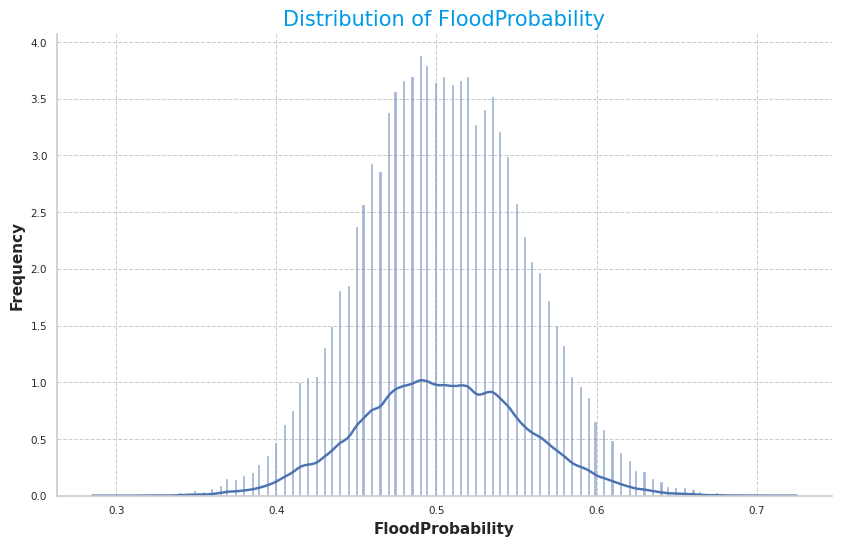

In [172]:
target_groups = train_df.copy()
plt.figure(figsize=(10, 6))
sns.histplot(data=target_groups, x='FloodProbability', kde=True,
             stat="percent"
              )
plt.title('Distribution of FloodProbability', fontsize=15)
plt.xlabel('FloodProbability')
plt.ylabel('Frequency')
plt.grid(True)
#plt.yscale('log')
plt.show()

In [173]:
train_df.FloodProbability.min(),train_df.FloodProbability.max(),

(0.285, 0.725)

**Notes**

- Target Feature restricted between 0.285 and 0.725

## 3.0 **EDA**

In [174]:
run_graph=0
features = list(test_df.columns)
len(features)

20

### 3.1 Categorical Features:

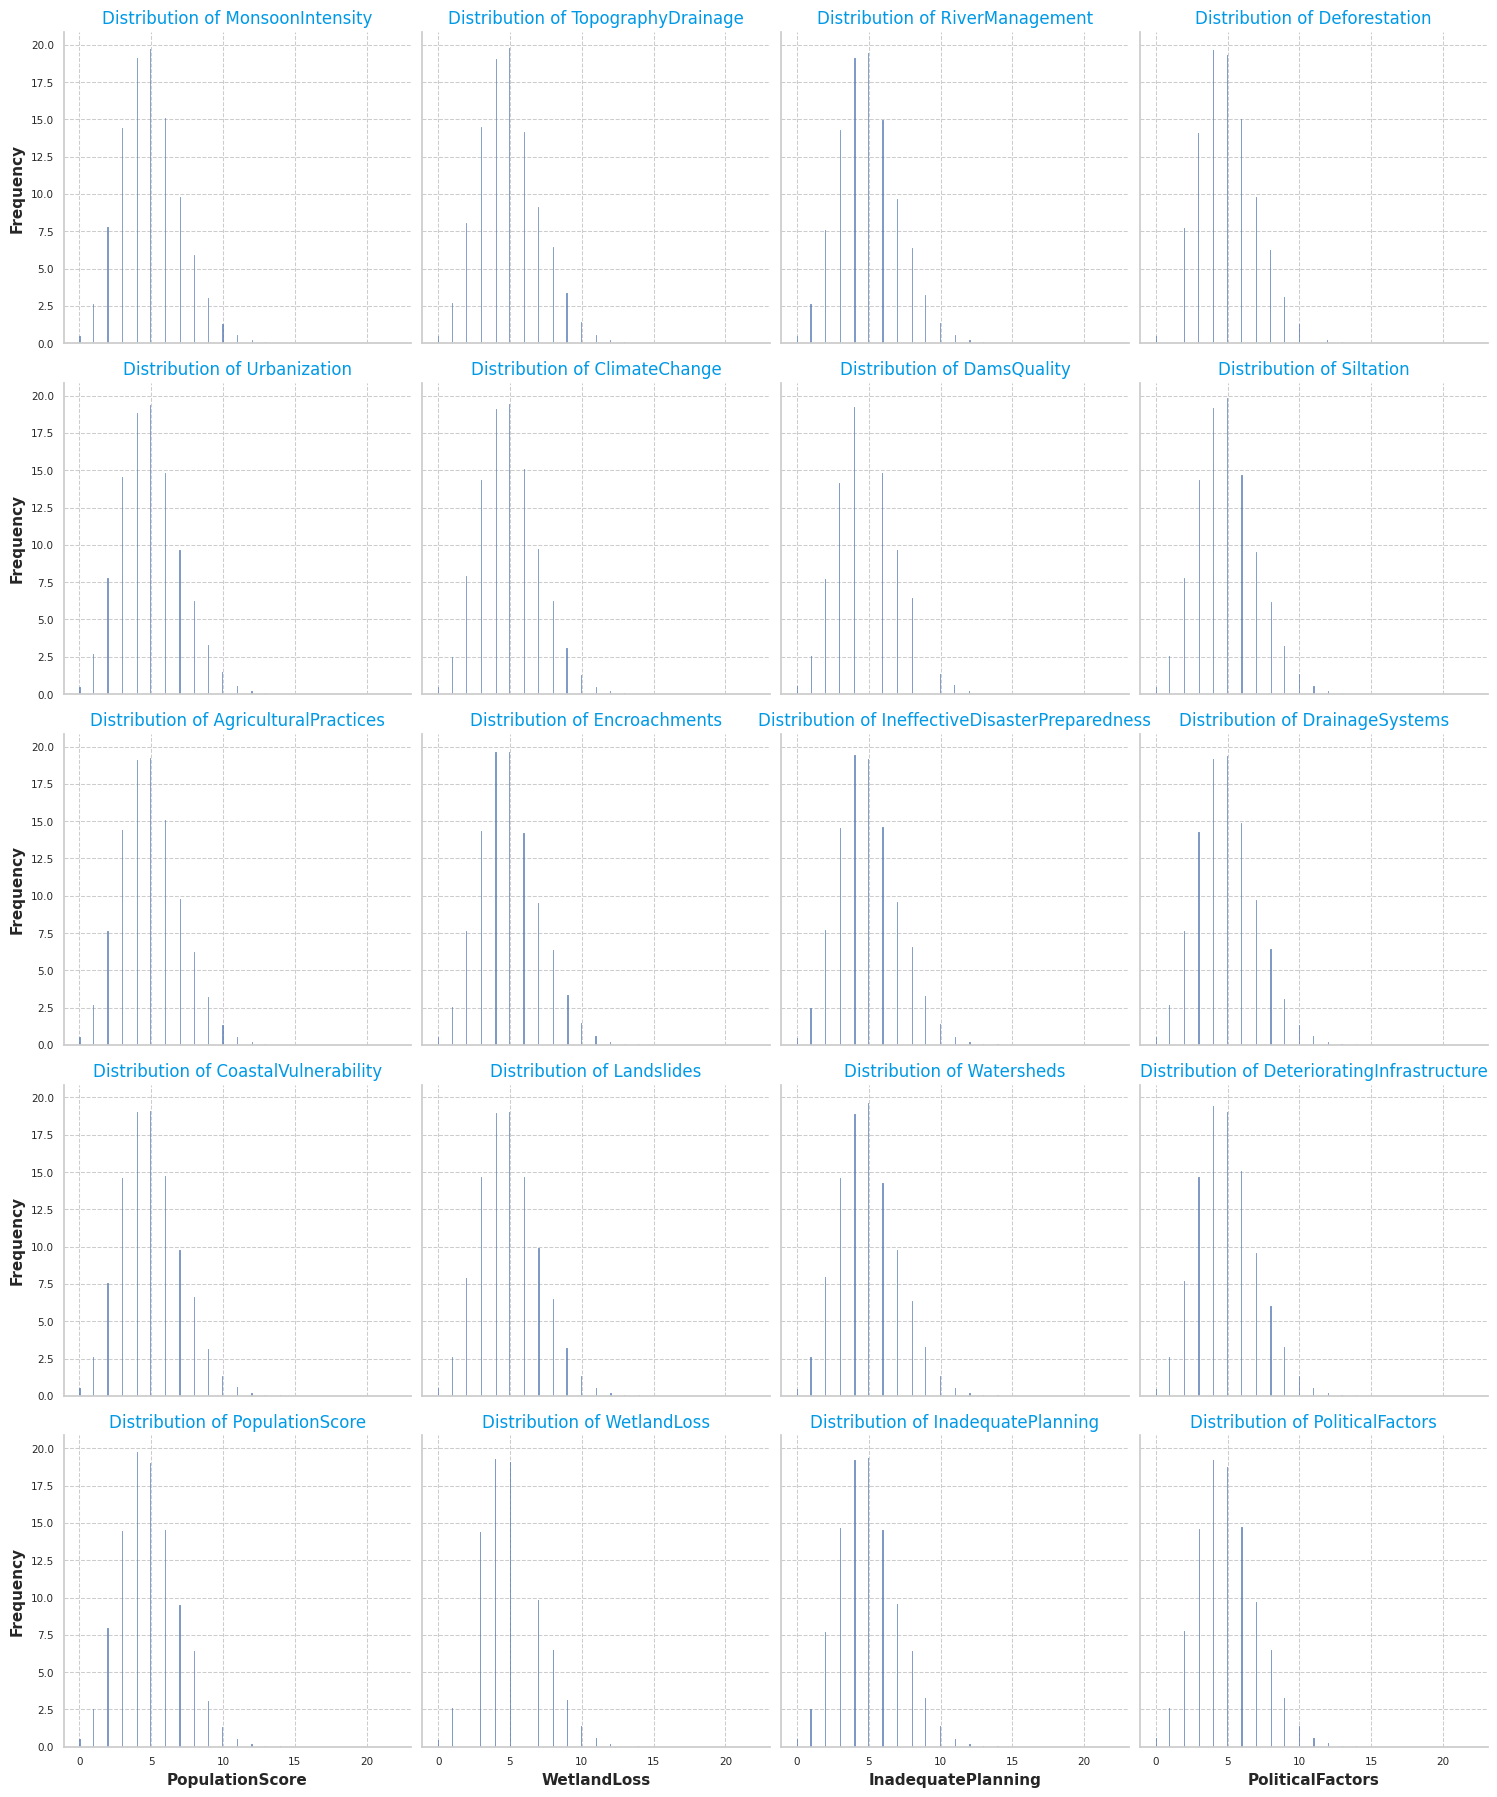

In [175]:
hist_df = train_df.sample(frac=0.3)

fig, axs = plt.subplots(5,4,figsize=(15,18),sharey=True,sharex=True)
axs = np.ravel(axs)
for num, f in enumerate(features):
  sns.histplot(data=hist_df, x=f, stat="percent", ax=axs[num])
  axs[num].set_title(f'Distribution of {f}', fontsize=12)
  axs[num].set_xlabel(f)
  axs[num].set_ylabel('Frequency')
  axs[num].grid(True,linestyle="--")

plt.tight_layout()

#### **Add Average Score**

In [181]:
features

['MonsoonIntensity',
 'TopographyDrainage',
 'RiverManagement',
 'Deforestation',
 'Urbanization',
 'ClimateChange',
 'DamsQuality',
 'Siltation',
 'AgriculturalPractices',
 'Encroachments',
 'IneffectiveDisasterPreparedness',
 'DrainageSystems',
 'CoastalVulnerability',
 'Landslides',
 'Watersheds',
 'DeterioratingInfrastructure',
 'PopulationScore',
 'WetlandLoss',
 'InadequatePlanning',
 'PoliticalFactors']

In [182]:
train_df["average_score"] = train_df[features].mean(axis=1)
test_df["average_score"] = test_df[features].mean(axis=1)

train_df["median_score"] = train_df[features].median(axis=1)
test_df["median_score"] = test_df[features].median(axis=1)

train_df["risk_factors"] = (train_df[features] > 4).sum(axis=1).values
test_df["risk_factors"] = (test_df[features] > 4).sum(axis=1).values

train_df["risk_mitigation_factors"] = (train_df[features] > 9).sum(axis=1).values-(train_df[features] < 5).sum(axis=1).values
test_df["risk_mitigation_factors"] = (test_df[features] > 9).sum(axis=1).values-(test_df[features] < 5).sum(axis=1).values

In [183]:
from scipy.stats import pearsonr, spearmanr

df_results = pd.DataFrame(index=[2,3,4,5,6,7,8,9,10,11], columns=["Pearson","Spearman"])

for i in [2,3,4,5,6,7,8,9,10,11,12,13]:

  try_val = (train_df[features] > i).sum(axis=1).values
  y = train_df.FloodProbability.values
  df_results.loc[i,"Spearman"] = spearmanr(try_val, y)[0]
  df_results.loc[i,"Pearson"] = pearsonr(try_val, y)[0]


df_results

,Pearson,Spearman
2,0.498371,0.473656
3,0.629731,0.598846
4,0.714516,0.682824
5,0.703016,0.668866
6,0.633999,0.594872
7,0.541231,0.50418
8,0.398076,0.365398
9,0.283034,0.256485
10,0.19952,0.182322
11,0.138139,0.127497


In [184]:
df_results = pd.DataFrame(index=[0,1,2,3,4,5,6], columns=["Pearson","Spearman"])

for i in [0,1,2,3,4,5,6]:

  try_val = (train_df[features] > 8+i).sum(axis=1).values-(train_df[features] < 8-i).sum(axis=1).values
  y = train_df.FloodProbability.values
  df_results.loc[i,"Spearman"] = spearmanr(try_val, y)[0]
  df_results.loc[i,"Pearson"] = pearsonr(try_val, y)[0]


df_results

,Pearson,Spearman
0,0.532205,0.496872
1,0.643037,0.604059
2,0.717568,0.682957
3,0.72597,0.694359
4,0.636195,0.605089
5,0.501671,0.476581
6,0.315133,0.291513


In [185]:
df_results = pd.DataFrame(index=[0,1,2,3,4,5], columns=["Pearson","Spearman"])

for i in [0,1,2,3,4,5,6]:

  try_val = (train_df[features] > 7+i).sum(axis=1).values-(train_df[features] < 7-i).sum(axis=1).values
  y = train_df.FloodProbability.values
  df_results.loc[i,"Spearman"] = spearmanr(try_val, y)[0]
  df_results.loc[i,"Pearson"] = pearsonr(try_val, y)[0]


df_results

,Pearson,Spearman
0,0.65462,0.614676
1,0.739341,0.704351
2,0.758627,0.727711
3,0.663189,0.631502
4,0.519333,0.493061
5,0.327233,0.30281
6,0.168834,0.155864


### 3.2 Correlation Analysis

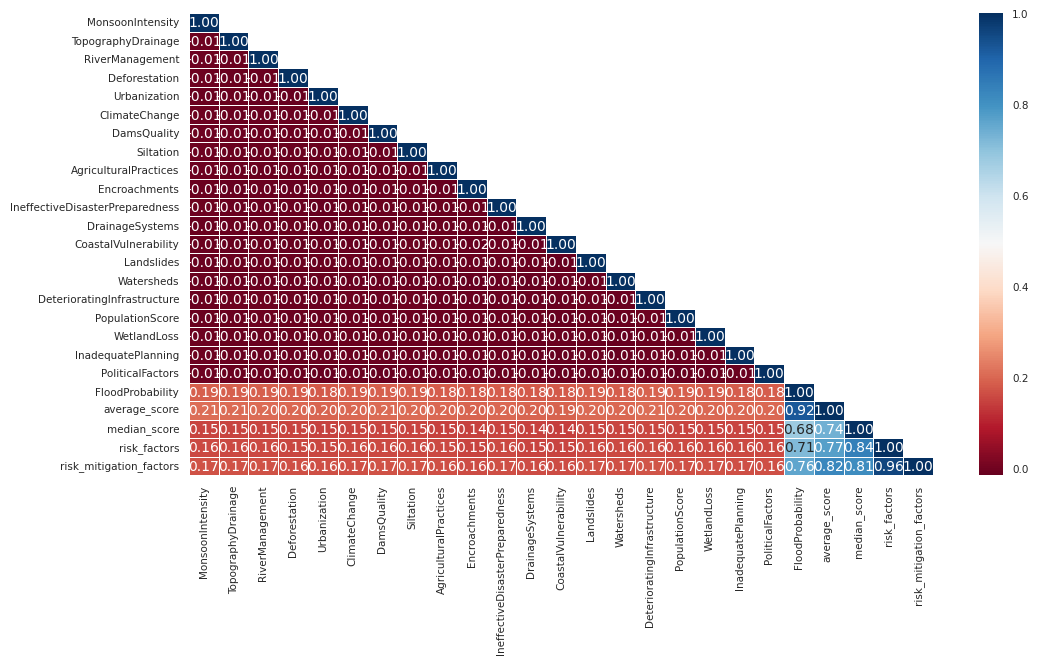

In [186]:
mask = np.zeros_like(train_df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

fig, axs = plt.subplots(1,1,figsize=(12,6))
g = sns.heatmap(train_df.corr(),
                annot=True,
                annot_kws={"fontsize": 10},
                fmt='.2f',
                linewidths=0.5,
                cmap='RdBu',
                mask=mask,
                ax=axs# the mask has been included here
                )
axs.grid(False)

In [187]:
train_df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability,average_score,median_score,risk_factors,risk_mitigation_factors
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445,4.70,4.5,10,-10
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450,4.70,4.0,9,-11
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530,4.95,5.0,13,-7
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535,5.20,5.0,12,-8
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415,3.60,3.0,6,-14


### 3.3 Single Features Analysis:

#### **MonsoonIntensity**

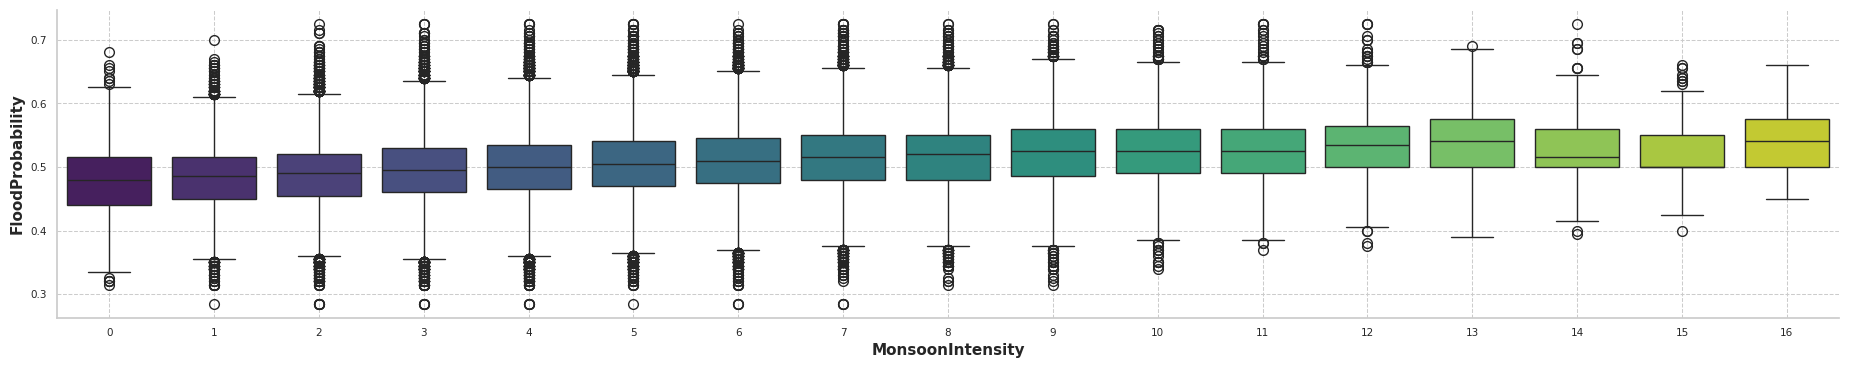

In [188]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="MonsoonIntensity", y="FloodProbability", palette="viridis", ax=axs);
  axs.grid(linestyle="--")

#### **TopographyDrainage**

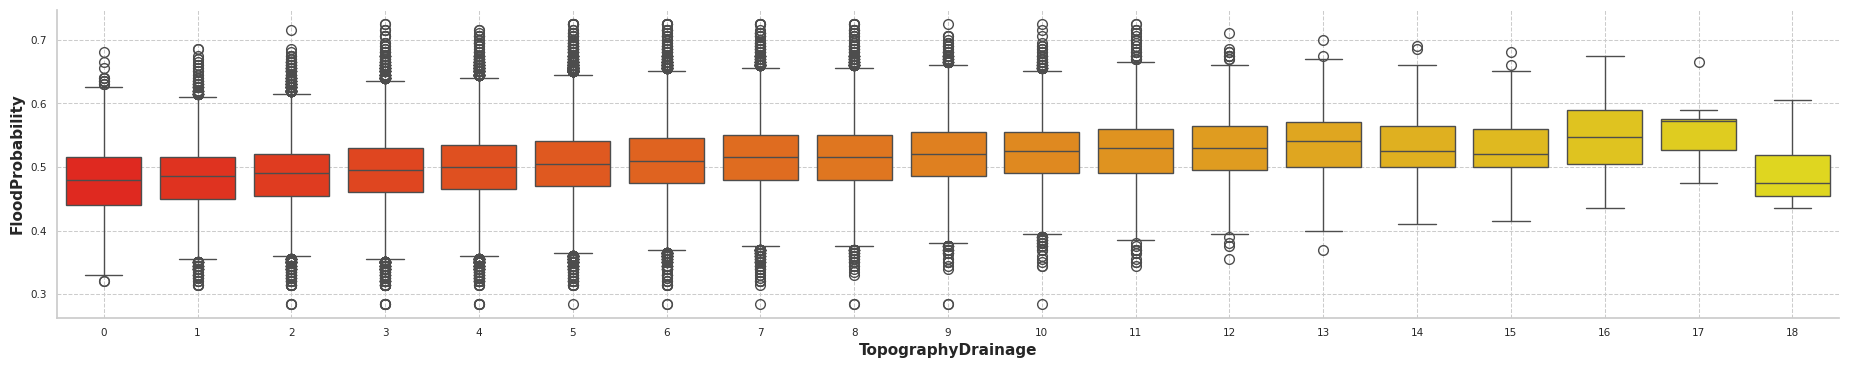

In [189]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="TopographyDrainage", y="FloodProbability", palette="autumn", ax=axs);
  axs.grid(linestyle="--")

#### **RiverManagement**

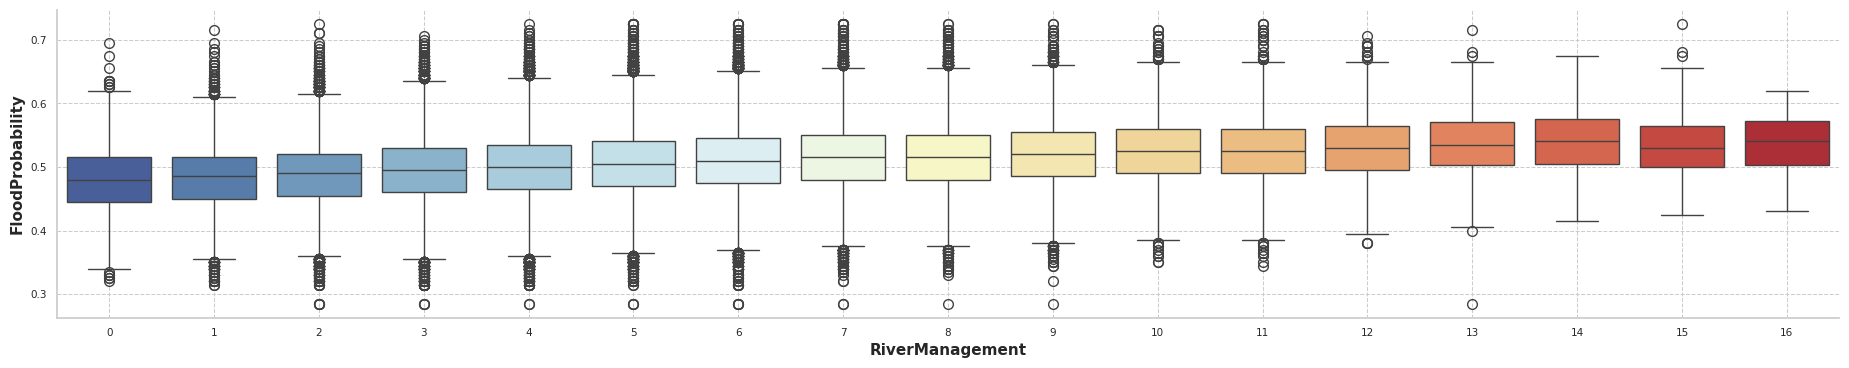

In [190]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="RiverManagement", y="FloodProbability", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")

#### **Deforestation**

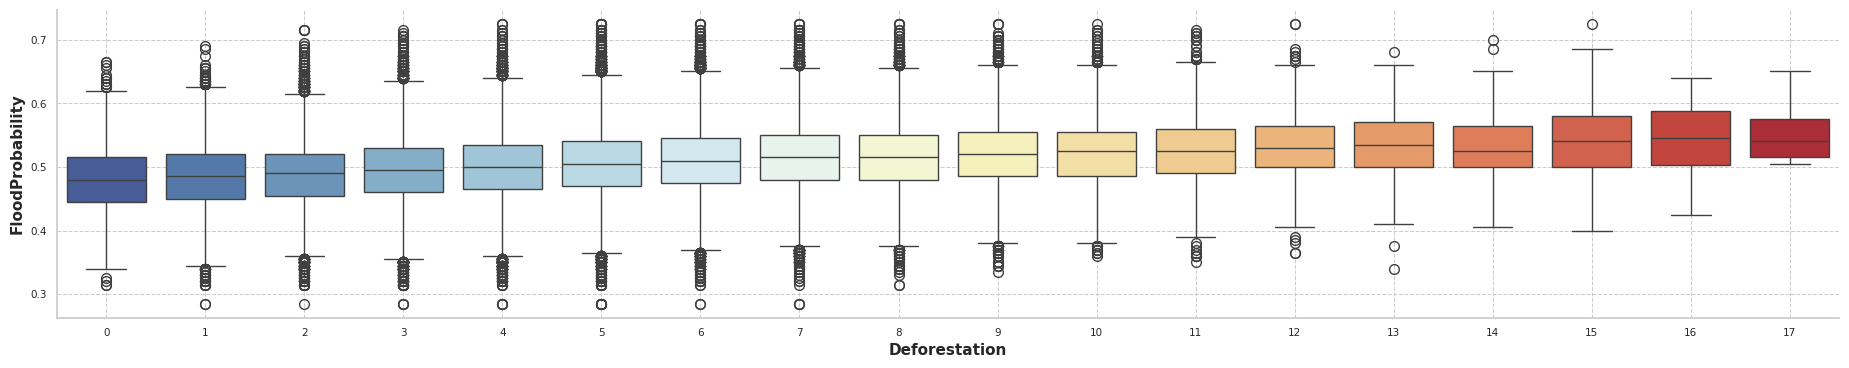

In [191]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="Deforestation", y="FloodProbability", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")

#### **Urbanization**

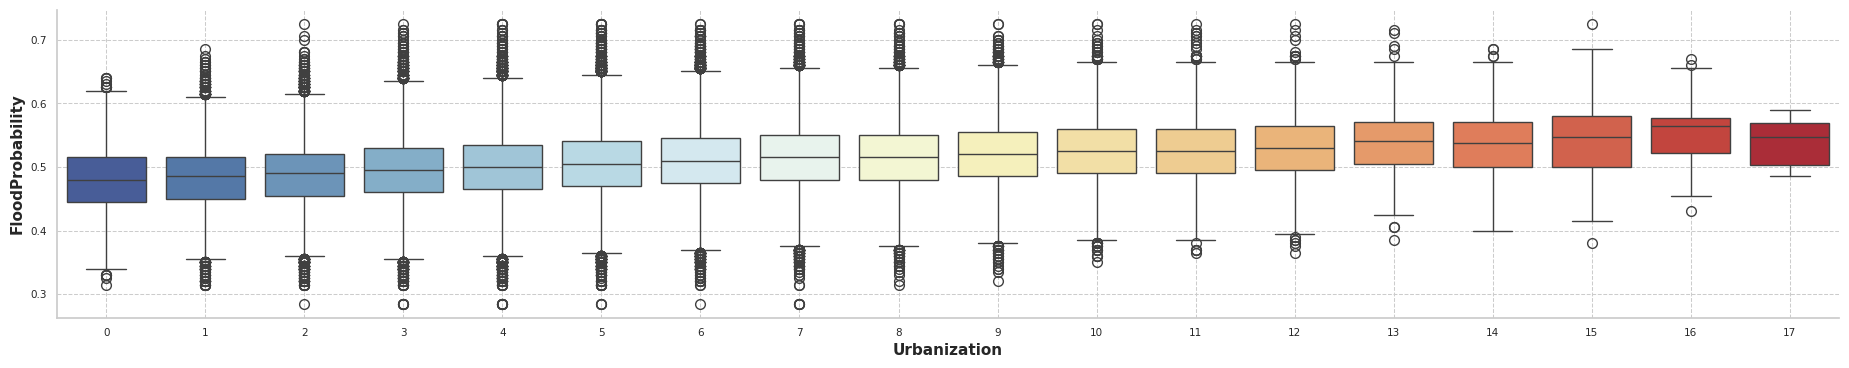

In [192]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="Urbanization", y="FloodProbability", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")

**ClimateChange**

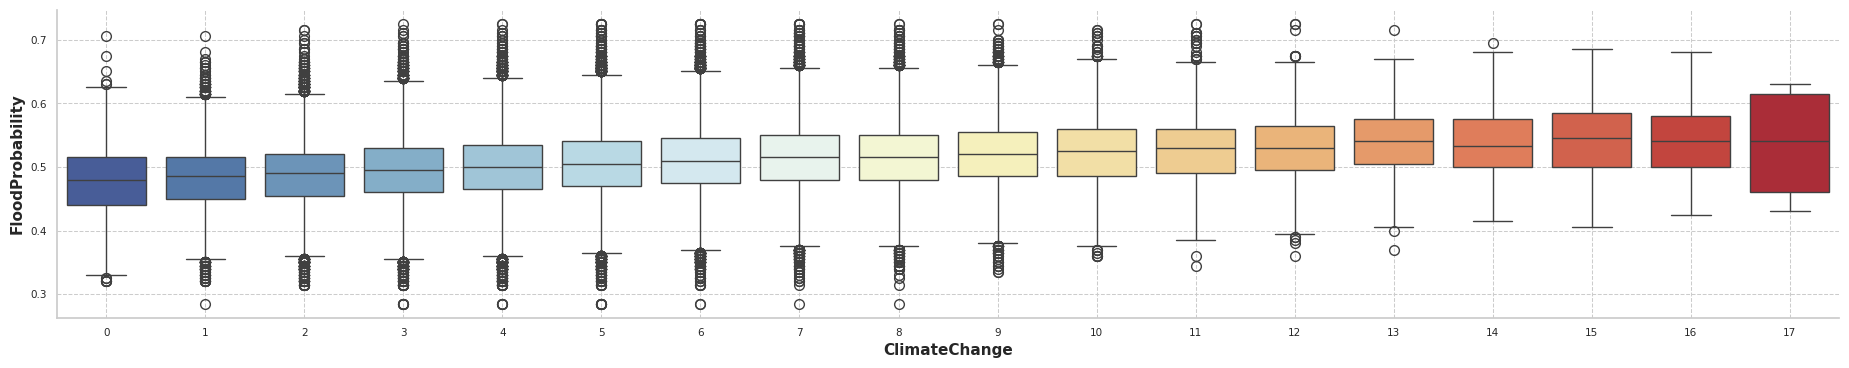

In [193]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="ClimateChange", y="FloodProbability", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")